In [1]:
import pickle

import matplotlib.pyplot as plt
import promptlib
import seaborn as sns

from face_recognition.api import get_known_people_from_encodings, get_known_people_from_dataset
from face_recognition.web_prediction import predict
from test.video_prediction import produce_video

method = input('Test by:\n (1) Webcam\n(2) video')
output_faces = []
person_name = ''

if method != '1' and method != '2':
    exit(1)
elif method == '1':
    name = input("Enter your name: ")
    faces = predict()
    names_in_db = get_known_people_from_dataset()
    x = {}
    print(faces)
    for nume in names_in_db:
        x[nume] = (faces.count(nume))
    x['unknown'] = faces.count('unknown')
    print(x)
    keys = [j for j in x.keys()]
    values = [j for j in x.values()]

    sns.set_style('dark')
    acc = x[name] * 100 / sum(values)

    sns.barplot(x=values, y=keys).set_title(f'{name.capitalize()} - acc: {acc}%')
    plt.show()

    print(x)
    exit(5)
elif method == '2':
    prompter = promptlib.Files()
    abs_path_to_video = prompter.file()
    should_be = input("Please enter person name:")
    file_name = abs_path_to_video.split('.')[0].split('/')[-1]
    output_faces = produce_video(abs_path_to_video, should_be)
    prompter.dst()

    print('Done.')


Writing frame 10 / 224 Accuracy=100.0%
Writing frame 20 / 224 Accuracy=100.0%
Writing frame 30 / 224 Accuracy=100.0%
Writing frame 40 / 224 Accuracy=100.0%
Writing frame 50 / 224 Accuracy=100.0%
Writing frame 60 / 224 Accuracy=100.0%
Writing frame 70 / 224 Accuracy=100.0%
Writing frame 80 / 224 Accuracy=100.0%
Writing frame 90 / 224 Accuracy=100.0%
Writing frame 100 / 224 Accuracy=100.0%
Writing frame 110 / 224 Accuracy=100.0%
Writing frame 120 / 224 Accuracy=100.0%
Writing frame 130 / 224 Accuracy=100.0%
Writing frame 140 / 224 Accuracy=100.0%
Writing frame 150 / 224 Accuracy=100.0%
Writing frame 160 / 224 Accuracy=100.0%
Writing frame 170 / 224 Accuracy=100.0%
Writing frame 180 / 224 Accuracy=100.0%
Writing frame 190 / 224 Accuracy=100.0%
Writing frame 200 / 224 Accuracy=100.0%
Writing frame 210 / 224 Accuracy=100.0%
Writing frame 220 / 224 Accuracy=100.0%
Done.


In [2]:
def return_results(output_faces, should_be):
    for i in range(len(output_faces)):
        output_faces[i] = output_faces[i].lower()

    if len(output_faces) == 0:
        print('No faces found')
        output_faces = []

    acc = output_faces.count(should_be) * 100 / len(output_faces)
    print(acc)

    known_encodings = get_known_people_from_encodings()
    for i in range(len(known_encodings)):
        known_encodings[i] = known_encodings[i].lower()

    names = {}
    for name in known_encodings:
        names[name] = output_faces.count(name.lower())
    names['unknown'] = output_faces.count('unknown')
    return [file_name.lower(), names, acc]


list = []
if len(output_faces) == 0:
    list[1] = 'noface'
else:
    list = return_results(output_faces, should_be)
print(list)

if len(output_faces) == 0:
    list[1] = 'noface'
with open(f'results/{list[0]}.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(list, filehandle)

100.0
['f', {'stefan': 0, 'yt4': 0, 'f': 222, 'costis': 0, 'raluca': 0, 'yt2': 0, 'costi': 0, 'alex': 0, 'yt3': 0, 'test_person_1': 0, 'yt1': 0, 'mom': 0, 'raed': 0, 'unknown': 0}, 100.0]


Accuracy=  80.70175438596492 %


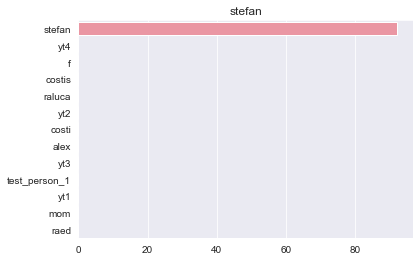

Accuracy=  100.0 %


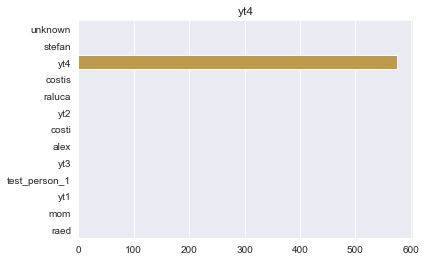

Accuracy=  80.24691358024691 %


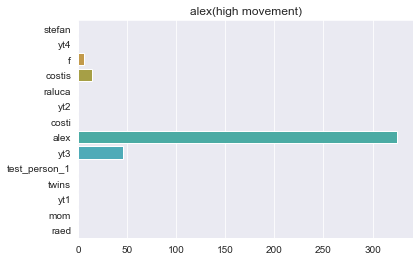

Accuracy=  100.0 %


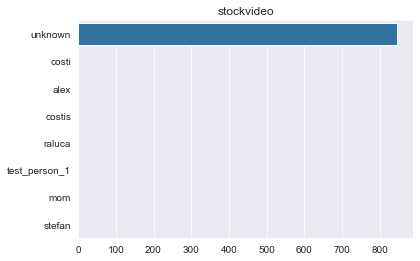

Accuracy=  100.0 %


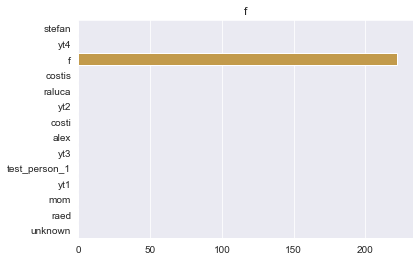

Accuracy=  100.0 %


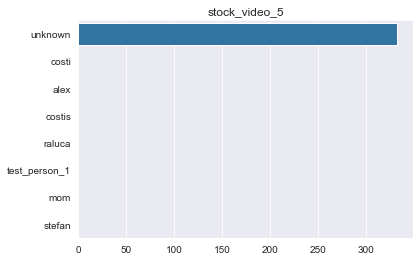

Accuracy=  56.52173913043478 %


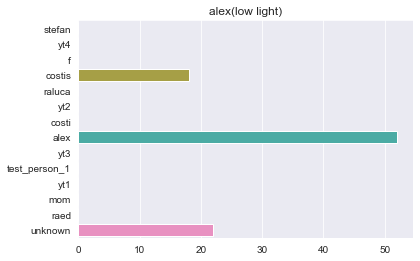

Accuracy=  100.0 %


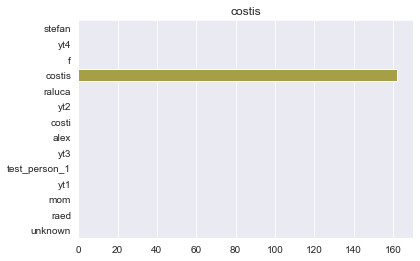

Accuracy=  100.0 %


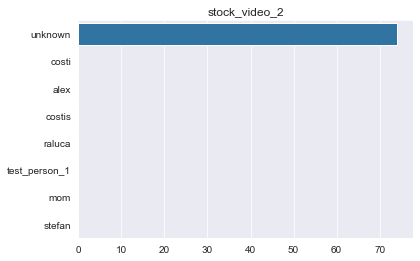

Accuracy=  92.84116331096197 %


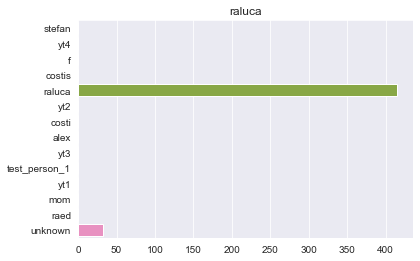

Accuracy=  100.0 %


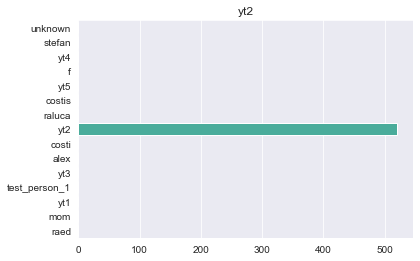

Accuracy=  98.01980198019803 %


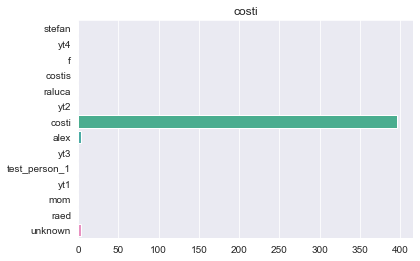

Accuracy=  97.70114942528735 %


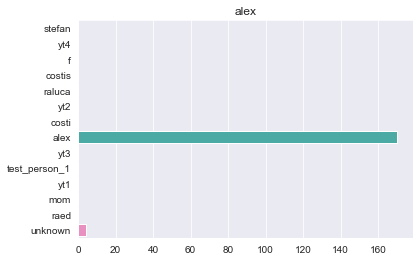

Accuracy=  100.0 %


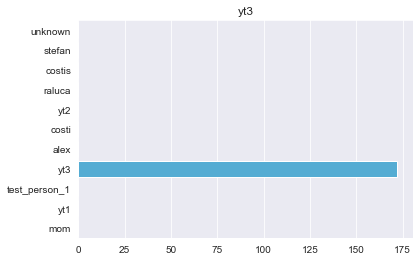

Accuracy=  100.0 %


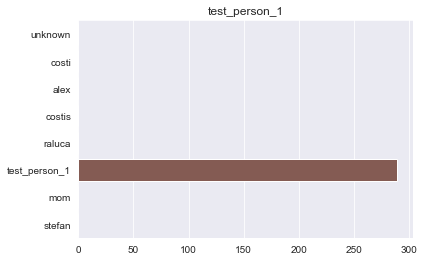

Accuracy=  100.0 %


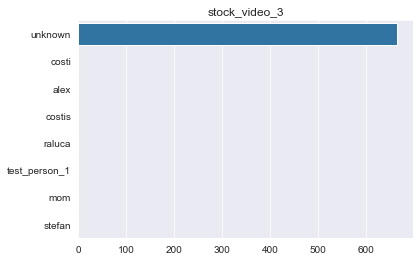

Accuracy=  100.0 %


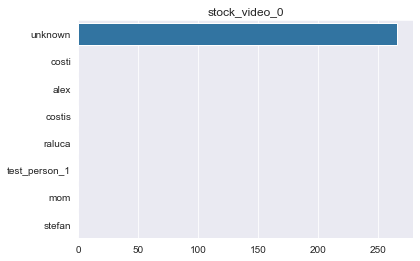

Accuracy=  100.0 %


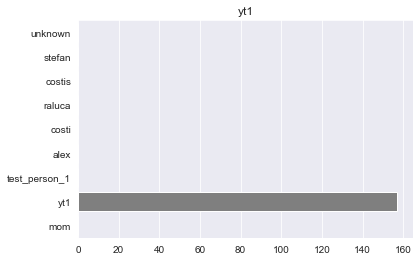

Accuracy=  0.0 %


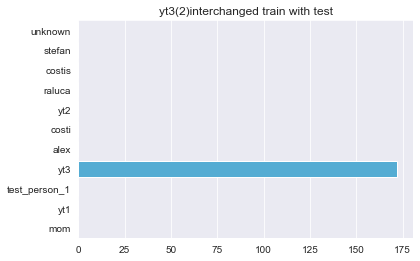

Accuracy=  100.0 %


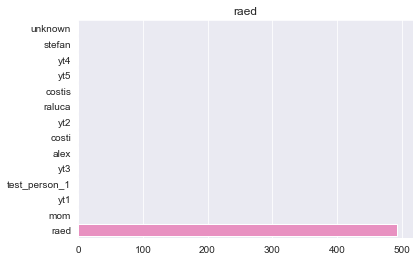

Accuracy=  93.22033898305085 %


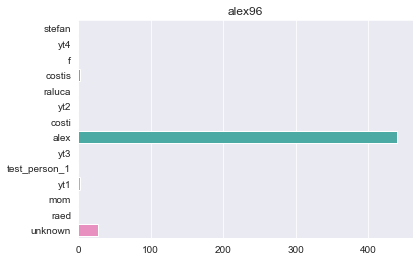

In [3]:

import pickle
import matplotlib.pyplot as plt
import os
import seaborn as sns


def plot_all_data():
    directory = 'results'
    objs = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and filename.endswith('data'):
            with open(f, 'rb') as filehandle:
                # read the data as binary data stream
                while 1:
                    try:
                        objs.append(pickle.load(filehandle))
                    except EOFError:
                        break
    sns.set_style('darkgrid')
    for results in objs:
        actual_name = results[0]
        output_faces = results[1]
        if output_faces == 'noface':
            sns.barplot(x=values, y=keys).set_title(actual_name + '- no face found')
            plt.show()
        else:
            acc = results[2]
            print('Accuracy= ', acc, '%')

            keys = [j for j in output_faces.keys()]
            values = [j for j in output_faces.values()]
            if actual_name == 'yt3(2)':
                sns.barplot(x=values, y=keys).set_title(actual_name + 'interchanged train with test')
            else:
                sns.barplot(x=values, y=keys).set_title(actual_name)

            plt.show()


plot_all_data()